Problem Statement: 

Vehicle Loan Default Prediction Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default.
 So in our project we going predict the probability of loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Installments) on the due date. 

Following Information regarding the loan and loanee are provided in the datasets:  Loanee Information (Demographic data like age, income, Identity proof etc.) Loan Information (Disbursal details, amount, EMI, loan to value ratio etc.) Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.) Doing so will ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimizing the default rates.


# Importing the Required Libraries

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Exploring the Dataset

In [59]:
#Reading the data from the dataset file , and checing the size of the dataset and records in the dataset
df=pd.read_csv("Train_data.csv")
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [60]:
#Checking the shape of the dataset
df.shape

(233154, 41)

#So from the above we can say that the dataset has 41 Features and 233154 records

In [61]:
#Here were are checking about the Features in the dataset and also variables Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [62]:
#Checking whether we have any duplicate values in the dataset
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
233149    False
233150    False
233151    False
233152    False
233153    False
Length: 233154, dtype: bool

In [63]:
print(df[df.duplicated()]) # From below we can say that we have no dupliacted values in the dataset

Empty DataFrame
Columns: [UniqueID, disbursed_amount, asset_cost, ltv, branch_id, supplier_id, manufacturer_id, Current_pincode_ID, Date.of.Birth, Employment.Type, DisbursalDate, State_ID, Employee_code_ID, MobileNo_Avl_Flag, Aadhar_flag, PAN_flag, VoterID_flag, Driving_flag, Passport_flag, PERFORM_CNS.SCORE, PERFORM_CNS.SCORE.DESCRIPTION, PRI.NO.OF.ACCTS, PRI.ACTIVE.ACCTS, PRI.OVERDUE.ACCTS, PRI.CURRENT.BALANCE, PRI.SANCTIONED.AMOUNT, PRI.DISBURSED.AMOUNT, SEC.NO.OF.ACCTS, SEC.ACTIVE.ACCTS, SEC.OVERDUE.ACCTS, SEC.CURRENT.BALANCE, SEC.SANCTIONED.AMOUNT, SEC.DISBURSED.AMOUNT, PRIMARY.INSTAL.AMT, SEC.INSTAL.AMT, NEW.ACCTS.IN.LAST.SIX.MONTHS, DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, AVERAGE.ACCT.AGE, CREDIT.HISTORY.LENGTH, NO.OF_INQUIRIES, loan_default]
Index: []

[0 rows x 41 columns]


In [64]:
#We are setting the plot size using 'rcParams'
#If we do so then the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
#passing the width and height in inches to 'figure.figsize'
plt.rcParams['figure.figsize']=[15,8]

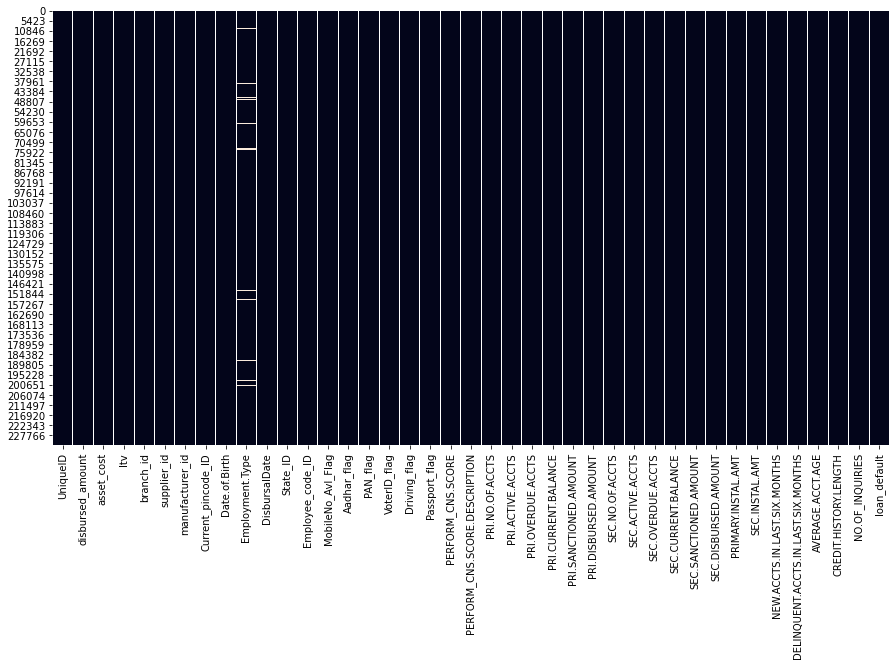

In [65]:
# Here plotting the heatmap to check the null values
#'cbar= False' does not show the color axis
sns.heatmap(df.isnull(),cbar=False)

plt.show()

In [66]:
#Lets check the Null Values in the dataset
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

So from the above we see that Employment.Type Feature is having more Null Values

In [67]:
#Now lets calucute the missing percent value from whole dataset
total_null =df.isnull().sum()
percent_null=(total_null/(df.isnull().count()))*100
missing_data=pd.concat([total_null,percent_null], keys=['Total','Percent'],axis=1)
print(missing_data)

                                     Total   Percent
UniqueID                                 0  0.000000
disbursed_amount                         0  0.000000
asset_cost                               0  0.000000
ltv                                      0  0.000000
branch_id                                0  0.000000
supplier_id                              0  0.000000
manufacturer_id                          0  0.000000
Current_pincode_ID                       0  0.000000
Date.of.Birth                            0  0.000000
Employment.Type                       7661  3.285811
DisbursalDate                            0  0.000000
State_ID                                 0  0.000000
Employee_code_ID                         0  0.000000
MobileNo_Avl_Flag                        0  0.000000
Aadhar_flag                              0  0.000000
PAN_flag                                 0  0.000000
VoterID_flag                             0  0.000000
Driving_flag                             0  0.

The percent of Employment.Type null values seems to 3.28%, so lets drop that Feature from the dataset

In [68]:
df.dropna(inplace=True)
total_null_ad =df.isnull().sum()
percent_null_ad=(total_null_ad/(df.isnull().count()))*100
missing_data_ad=pd.concat([total_null_ad,percent_null_ad], keys=['Total','Percent'],axis=1)
print(missing_data_ad)


                                     Total  Percent
UniqueID                                 0      0.0
disbursed_amount                         0      0.0
asset_cost                               0      0.0
ltv                                      0      0.0
branch_id                                0      0.0
supplier_id                              0      0.0
manufacturer_id                          0      0.0
Current_pincode_ID                       0      0.0
Date.of.Birth                            0      0.0
Employment.Type                          0      0.0
DisbursalDate                            0      0.0
State_ID                                 0      0.0
Employee_code_ID                         0      0.0
MobileNo_Avl_Flag                        0      0.0
Aadhar_flag                              0      0.0
PAN_flag                                 0      0.0
VoterID_flag                             0      0.0
Driving_flag                             0      0.0
Passport_fla

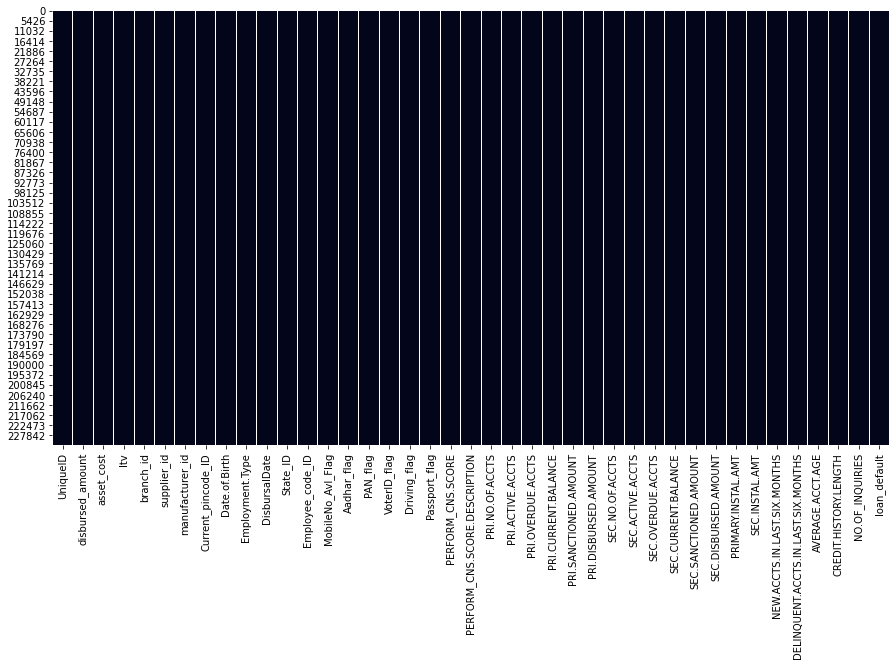

In [69]:
#Re-Checking the Heatmap for null values
sns.heatmap(df.isnull(),cbar=False)

plt.show()

Removing Insignificant cariables

In [70]:
df=df.drop(['UniqueID','branch_id','supplier_id','Current_pincode_ID','State_ID',
            'Employee_code_ID','Date.of.Birth','DisbursalDate'], axis=1)

In [71]:
df.shape

(225493, 33)

#Here we are seperating the categorical variables and numerical features

In [72]:
#Numerical values
numerical_Features=list(df._get_numeric_data().columns)
numerical_Features

['disbursed_amount',
 'asset_cost',
 'ltv',
 'manufacturer_id',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'loan_default']

<function matplotlib.pyplot.show(close=None, block=None)>

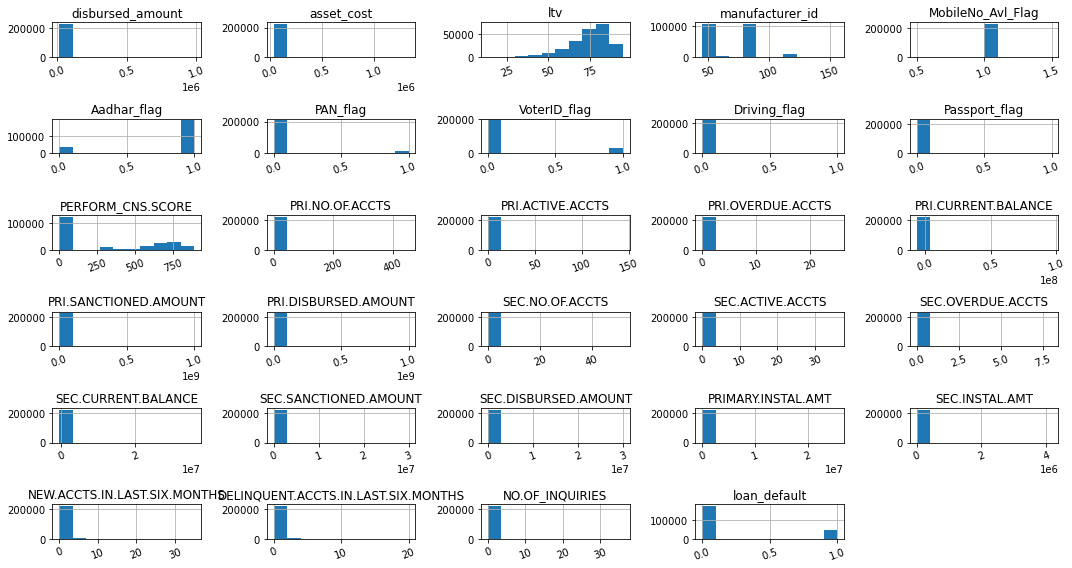

In [73]:
#Ploting the histogram for numeric variable, this hist() function considers oly the numeric variables by default
#rotate the x-axis lables by 20 degree using the parameter, 'xrot'

df.hist(xrot=20, )
#adjusting the subplots
plt.tight_layout()
plt.show

In [74]:
#categorical variables
categorical_Features=list(set(df.columns)-set(numerical_Features))
categorical_Features

['Employment.Type',
 'AVERAGE.ACCT.AGE',
 'CREDIT.HISTORY.LENGTH',
 'PERFORM_CNS.SCORE.DESCRIPTION']

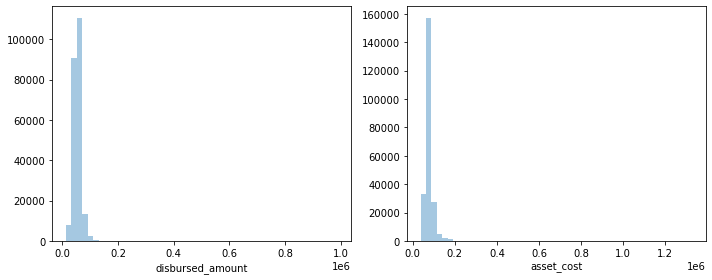

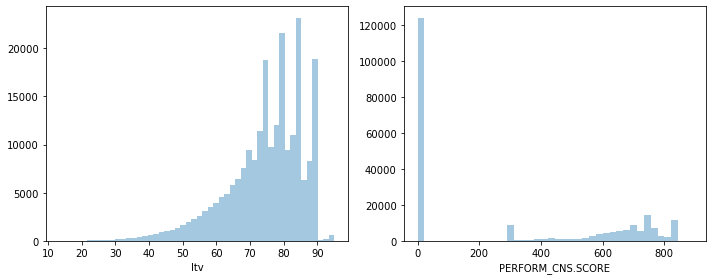

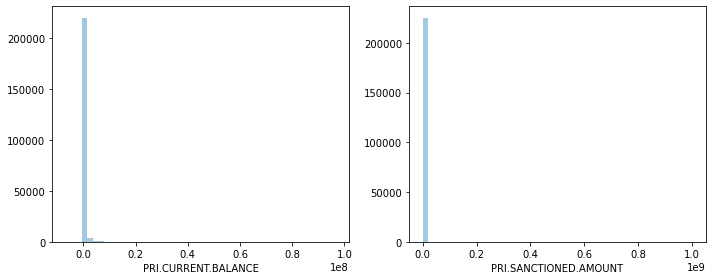

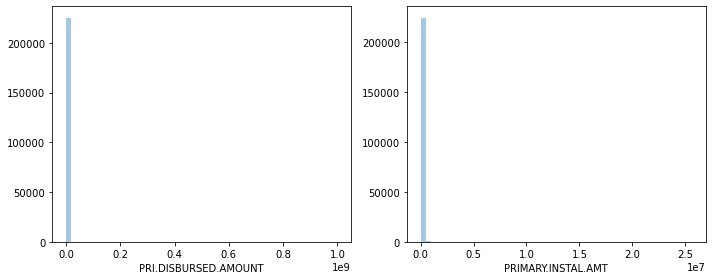

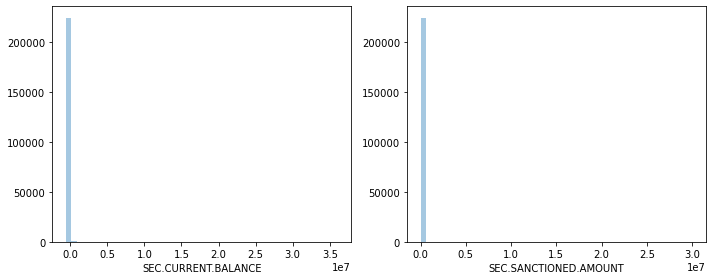

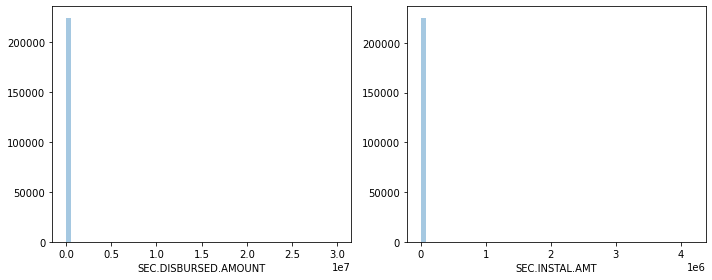

In [75]:
#here lets see the plotting for few of the numeric features in the dataset
num_Features=['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT',
              'PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT',
             'SEC.INSTAL.AMT']
for i in range(0,len(num_Features), 2):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.distplot(df[num_Features[i]], kde=False)
    plt.subplot(122)
    sns.distplot(df[num_Features[i+1]], kde=False)
    plt.tight_layout()
    plt.show()
    

In [76]:
df.skew()

disbursed_amount                         3.069300
asset_cost                               4.055664
ltv                                     -1.076667
manufacturer_id                          0.387100
MobileNo_Avl_Flag                        0.000000
Aadhar_flag                             -1.831925
PAN_flag                                 3.163265
VoterID_flag                             1.992343
Driving_flag                             6.264506
Passport_flag                           21.560059
PERFORM_CNS.SCORE                        0.424451
PRI.NO.OF.ACCTS                          9.857232
PRI.ACTIVE.ACCTS                         5.376997
PRI.OVERDUE.ACCTS                        7.486696
PRI.CURRENT.BALANCE                     29.256247
PRI.SANCTIONED.AMOUNT                  319.533663
PRI.DISBURSED.AMOUNT                   318.400468
SEC.NO.OF.ACCTS                         27.842352
SEC.ACTIVE.ACCTS                        30.409660
SEC.OVERDUE.ACCTS                       24.014315


In [77]:
df_num =df.select_dtypes(include =np.number)

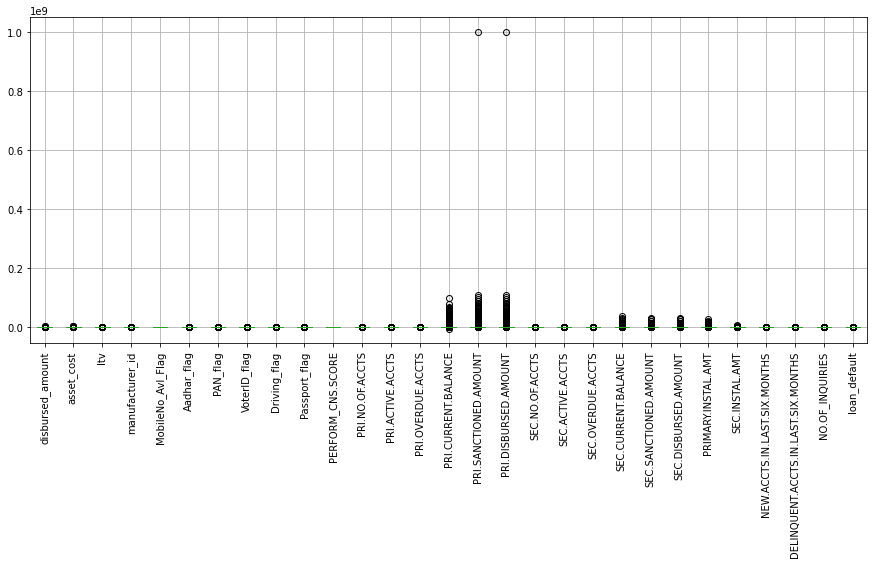

In [78]:
plt.figure(figsize=(15,6))
df_num.boxplot()
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='PRI.SANCTIONED.AMOUNT'>

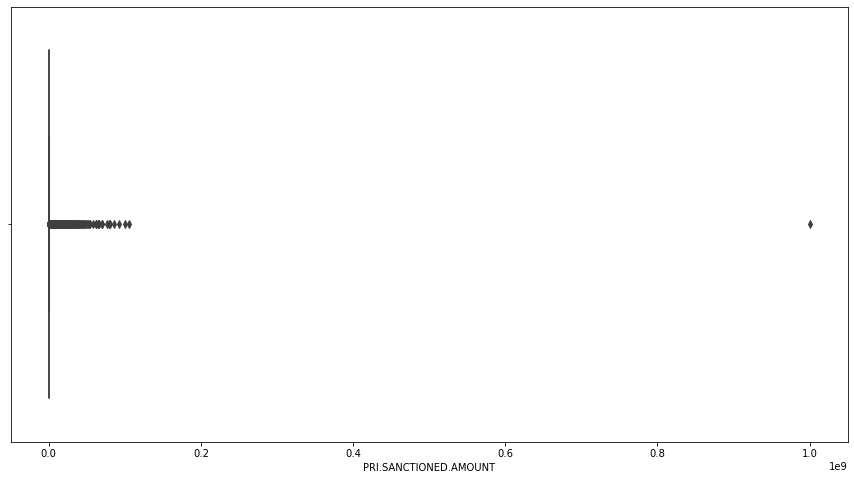

In [79]:
sns.boxplot(df['PRI.SANCTIONED.AMOUNT'])

<AxesSubplot:xlabel='PRI.DISBURSED.AMOUNT'>

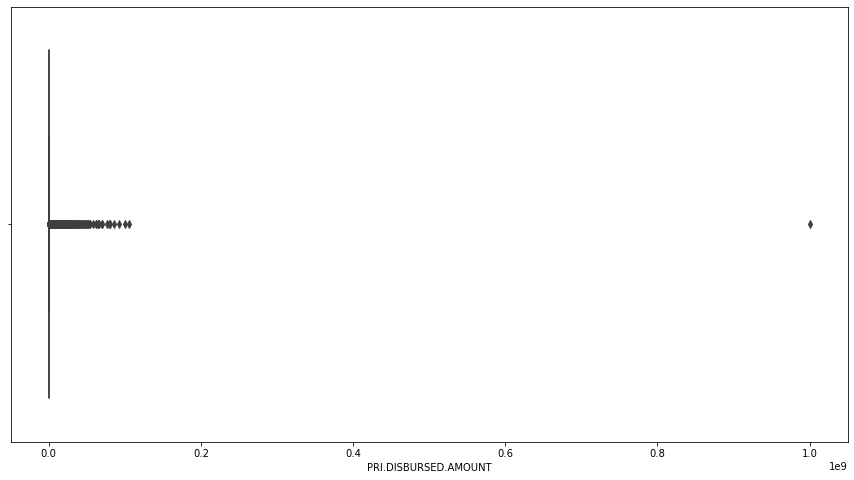

In [80]:
sns.boxplot(df['PRI.DISBURSED.AMOUNT'])

<AxesSubplot:xlabel='SEC.CURRENT.BALANCE'>

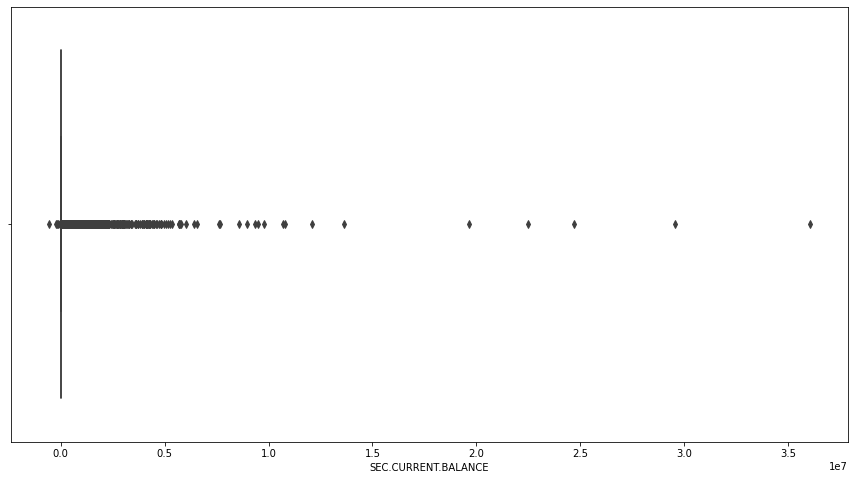

In [81]:
sns.boxplot(df['SEC.CURRENT.BALANCE'])

<AxesSubplot:xlabel='SEC.INSTAL.AMT'>

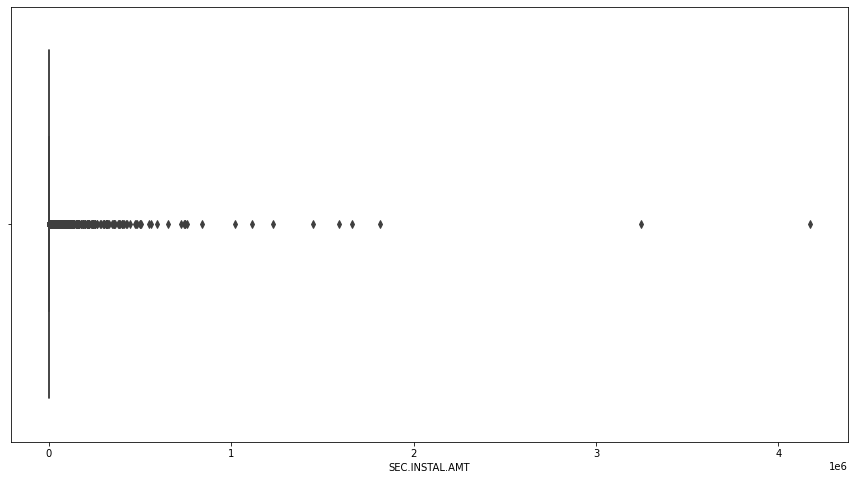

In [82]:
sns.boxplot(df['SEC.INSTAL.AMT'])

In [83]:
#square root transformation
df_num=np.sqrt(df_num)

In [84]:
df_num.skew()

disbursed_amount                        0.359968
asset_cost                              1.984145
ltv                                    -1.410590
manufacturer_id                         0.196784
MobileNo_Avl_Flag                       0.000000
Aadhar_flag                            -1.831925
PAN_flag                                3.163265
VoterID_flag                            1.992343
Driving_flag                            6.264506
Passport_flag                          21.560059
PERFORM_CNS.SCORE                       0.272444
PRI.NO.OF.ACCTS                         1.420058
PRI.ACTIVE.ACCTS                        1.119462
PRI.OVERDUE.ACCTS                       2.918367
PRI.CURRENT.BALANCE                     4.403256
PRI.SANCTIONED.AMOUNT                   5.856688
PRI.DISBURSED.AMOUNT                    5.885815
SEC.NO.OF.ACCTS                         8.986151
SEC.ACTIVE.ACCTS                        9.870673
SEC.OVERDUE.ACCTS                      14.428983
SEC.CURRENT.BALANCE 

After the square Root Transformation we see the skewness has been reduced.

In [85]:
#Checking the categorical Features 
df[categorical_Features].head()

,Employment.Type,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,PERFORM_CNS.SCORE.DESCRIPTION
0,Salaried,0yrs 0mon,0yrs 0mon,No Bureau History Available
1,Self employed,1yrs 11mon,1yrs 11mon,I-Medium Risk
2,Self employed,0yrs 0mon,0yrs 0mon,No Bureau History Available
3,Self employed,0yrs 8mon,1yrs 3mon,L-Very High Risk
4,Self employed,0yrs 0mon,0yrs 0mon,No Bureau History Available


#Here from the above we see that we need to convert two Features into Years ('CREDIT.HISTORY.LENGTH' and 'AVERAGE.ACCT.AGE' )

People with Employement Type 'Self employed' are more in number for default loan than the salaried people

In [86]:
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].str.replace('yrs ','.',regex=False)
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].str.replace('mon','',regex=False).astype(float)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].str.replace('yrs ','.',regex=False)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].str.replace('mon','',regex=False).astype(float)
df[categorical_Features].head()

,Employment.Type,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,PERFORM_CNS.SCORE.DESCRIPTION
0,Salaried,0.00,0.00,No Bureau History Available
1,Self employed,1.11,1.11,I-Medium Risk
2,Self employed,0.00,0.00,No Bureau History Available
3,Self employed,0.80,1.30,L-Very High Risk
4,Self employed,0.00,0.00,No Bureau History Available


In [87]:
#Checking the Employment.Type Feature
df['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [88]:
# We are encoding the values in for the feature ['Employment.Type'] as 0's and 1's
df['Employment.Type'].replace({'Self employed': 1, 'Salaried' : 0}, inplace =True)

In [89]:
#Next we are dropping the unecessary Features
df.drop(['PERFORM_CNS.SCORE.DESCRIPTION'], axis = 1, inplace=True)

In [90]:
#Checking the shape now after dropping few features
df.shape

(225493, 32)

In [91]:
#Checking the unique values in each features in the dataset
df.nunique()


disbursed_amount                       24228
asset_cost                             45415
ltv                                     6541
manufacturer_id                           11
Employment.Type                            2
MobileNo_Avl_Flag                          1
Aadhar_flag                                2
PAN_flag                                   2
VoterID_flag                               2
Driving_flag                               2
Passport_flag                              2
PERFORM_CNS.SCORE                        573
PRI.NO.OF.ACCTS                          107
PRI.ACTIVE.ACCTS                          40
PRI.OVERDUE.ACCTS                         22
PRI.CURRENT.BALANCE                    70044
PRI.SANCTIONED.AMOUNT                  43743
PRI.DISBURSED.AMOUNT                   47206
SEC.NO.OF.ACCTS                           37
SEC.ACTIVE.ACCTS                          23
SEC.OVERDUE.ACCTS                          9
SEC.CURRENT.BALANCE                     3197
SEC.SANCTI

In [92]:
#We see that there is oly one value in 
df=df.drop(['MobileNo_Avl_Flag'],axis=1)

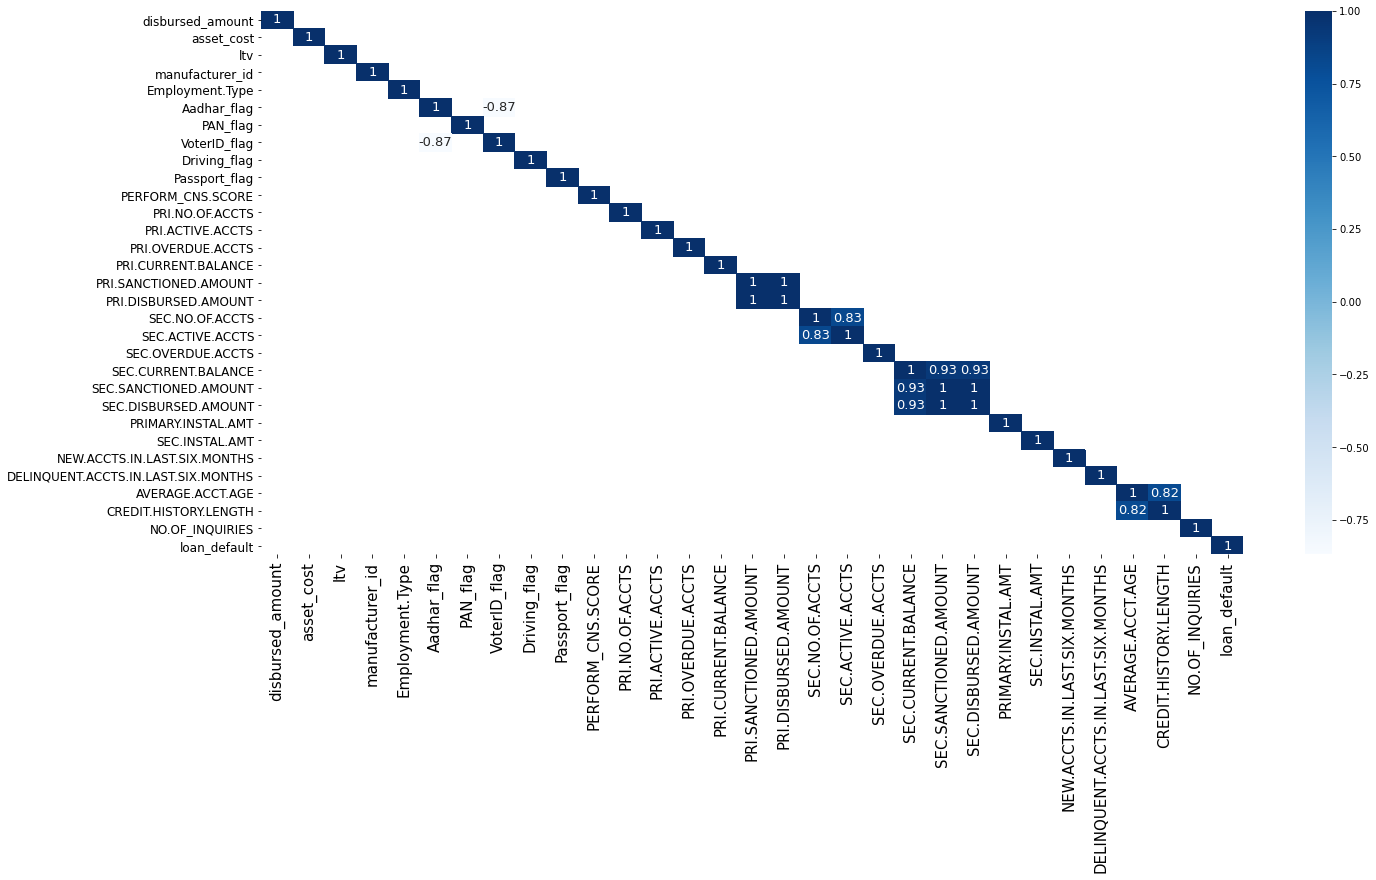

In [93]:
plt.figure(figsize =(22,10))

sns.heatmap(df.corr()[np.abs(df.corr()) > 0.8], annot = True, annot_kws ={"size": 13}, cmap ='Blues')
plt.yticks(rotation ='horizontal', fontsize = 12)
plt.xticks(fontsize = 15)
plt.show()

In [94]:
#Checking the Correlation
df.corr()

,disbursed_amount,asset_cost,ltv,manufacturer_id,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
disbursed_amount,1.000000,0.746037,0.386100,0.101446,-0.020152,-0.017712,0.015386,0.013568,0.001876,0.009198,...,-0.005198,-0.005046,0.001982,-0.005591,0.038143,0.021570,0.003847,0.013899,0.039704,0.079286
asset_cost,0.746037,1.000000,-0.301058,0.000845,0.058407,-0.099504,0.051023,0.089092,0.021857,0.006336,...,-0.010786,-0.010605,-0.005412,-0.005861,-0.020691,-0.006612,-0.014911,-0.022627,-0.016940,0.015620
ltv,0.386100,-0.301058,1.000000,0.119240,-0.107451,0.109765,-0.039642,-0.100777,-0.024907,0.004604,...,0.008735,0.008675,0.008008,0.000593,0.084097,0.041485,0.027829,0.052298,0.085804,0.097996
manufacturer_id,0.101446,0.000845,0.119240,1.000000,-0.037026,0.042001,-0.030829,-0.047401,0.005066,0.016026,...,0.003149,0.003249,0.013997,0.003094,0.050058,0.018968,0.040603,0.060658,0.010108,-0.025594
Employment.Type,-0.020152,0.058407,-0.107451,-0.037026,1.000000,-0.087472,0.003008,0.089079,0.002521,-0.005197,...,-0.001869,-0.001896,0.013383,-0.005387,-0.009426,0.007327,-0.001630,-0.009292,0.001829,0.029089
Aadhar_flag,-0.017712,-0.099504,0.109765,0.042001,-0.087472,1.000000,-0.203741,-0.868597,-0.283258,-0.082239,...,0.007894,0.007839,0.015685,0.006286,0.061249,0.024687,0.013898,0.038456,0.028444,-0.043455
PAN_flag,0.015386,0.051023,-0.039642,-0.030829,0.003008,-0.203741,1.000000,0.176338,-0.008766,0.001689,...,0.015196,0.014822,-0.010800,-0.000207,0.006274,-0.003112,0.013426,0.008638,0.016470,0.002079
VoterID_flag,0.013568,0.089092,-0.100777,-0.047401,0.089079,-0.868597,0.176338,1.000000,-0.049050,-0.017326,...,-0.007063,-0.007020,-0.018794,-0.006043,-0.061482,-0.028311,-0.021054,-0.046546,-0.019158,0.045778
Driving_flag,0.001876,0.021857,-0.024907,0.005066,0.002521,-0.283258,-0.008766,-0.049050,1.000000,-0.004683,...,0.002539,0.002522,0.004168,-0.000832,-0.001271,0.010929,0.016986,0.020728,-0.021908,-0.005575
Passport_flag,0.009198,0.006336,0.004604,0.016026,-0.005197,-0.082239,0.001689,-0.017326,-0.004683,1.000000,...,0.003598,0.003564,0.013620,0.000554,0.008571,0.007064,0.014861,0.021585,-0.001712,-0.007841


In [95]:
#Dropping primary sanctioned amount and secondary sanctioned amount
df=df.drop(['PRI.SANCTIONED.AMOUNT'],axis=1)
df=df.drop(['SEC.SANCTIONED.AMOUNT'],axis =1)

Plotting the distribution of target variable

Distribution of the loan_default in the dataset
0    0.782845
1    0.217155
Name: loan_default, dtype: float64


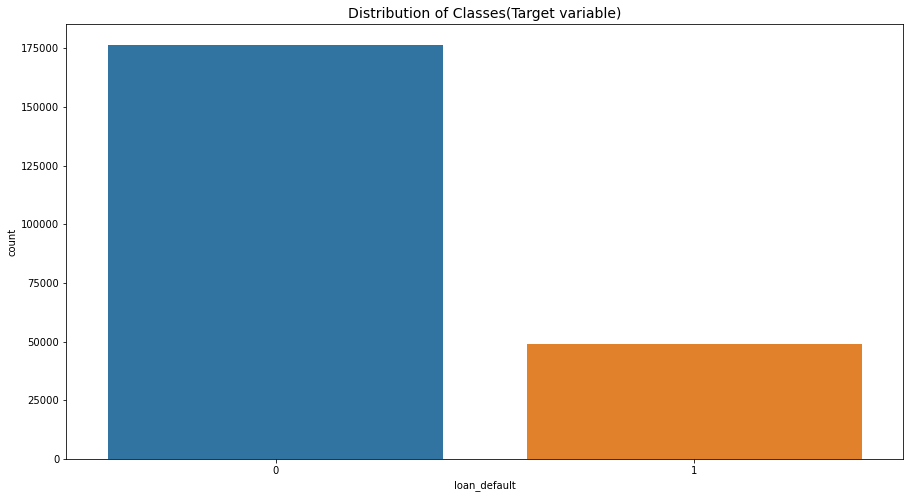

In [96]:
print('Distribution of the loan_default in the dataset')
print(df['loan_default'].value_counts()/len(df))

sns.countplot('loan_default',data=df)
plt.title('Distribution of Classes(Target variable)', fontsize=14)
plt.show()

So fromm the above we can see that imbalance between two classes, we must resolve it, 
here we can use the class imbalance by oversampling class1.

In [97]:
#Over sampling to resolve the imbalance data
df = df.sample(frac=1)
loan_default_1 = df.loc[df['loan_default'] == 1]
loan_default_0 = df.loc[df['loan_default'] == 0]

normal_distributed_df=pd.concat([loan_default_1, loan_default_1, loan_default_1, loan_default_0])

#We are shuffling the dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state = 42)
new_df.head()

,disbursed_amount,asset_cost,ltv,manufacturer_id,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,...,SEC.CURRENT.BALANCE,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
39645,47749,74712,64.78,45,1,1,0,0,0,0,...,0,0,1009,0,1,2,1.0,2.1,0,0
167078,55759,71002,80.28,86,1,1,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,0
115892,54813,68115,82.51,86,1,1,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,1
149331,72762,87810,85.00,86,0,1,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0,1
226008,36439,46483,79.60,51,1,1,0,0,0,0,...,0,0,169000,0,2,0,0.6,1.6,1,0


Distribution of the loan_default in the dataset
0    0.545799
1    0.454201
Name: loan_default, dtype: float64


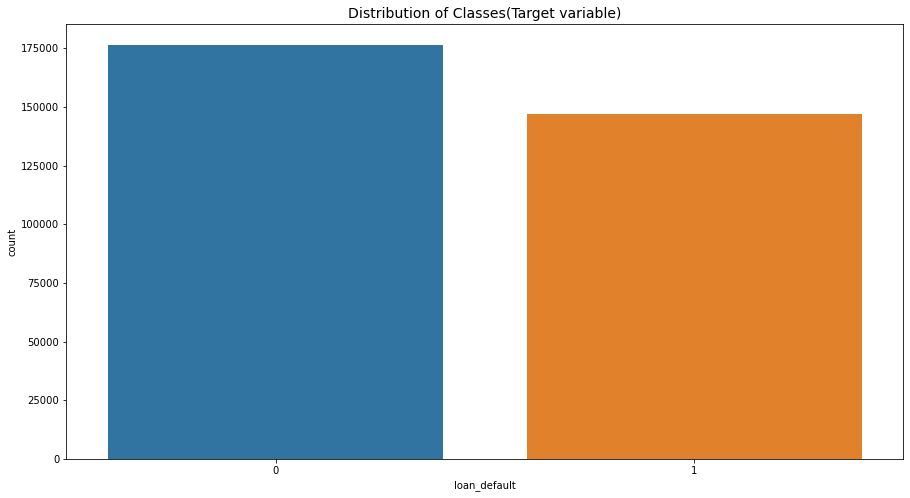

In [98]:
print('Distribution of the loan_default in the dataset')
print(new_df['loan_default'].value_counts()/len(new_df))

sns.countplot('loan_default',data=new_df)
plt.title('Distribution of Classes(Target variable)', fontsize=14)
plt.show()

In [99]:
new_df.shape

(323427, 29)

In [100]:
X=new_df.drop('loan_default',axis=1)
y=new_df['loan_default'].copy()

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [102]:
print("X_train size: ", X_train.shape)
print("X_test size:" ,X_test.shape)

X_train size:  (226398, 28)
X_test size: (97029, 28)


In [103]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [104]:
def plot_roc(model):
    
    
    #the roc_curve() returns the values for false positive rate, true positive rate and threshold
    #pass the actual target values and predicted probabilities to the fuction
    fpr,tpr,thresholds = roc_curve(y_test, y_pred)
    
    #plot the ROc Curve
    plt.plot(fpr,tpr)
    
    #set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    #plot the staright line showing worst prediction for the model
    plt.plot([0,1], [0,1], 'r--')
    
    #add plot and axes labels
    #set text size using 'fontsize'
    plt.title('ROC Curve for Vehicle Loan Default Prediction', fontsize =15)
    plt.xlabel('false positive rate(1-Specificity)', fontsize = 15)
    plt.ylabel ('True positive rate (Sensitivity)', fontsize = 15)
    
    #add the AUC Score to the plot and the 'x' and 'y' gives the position of text and 's' is the text 
    #use round()  to round-off the AUC score upto 4 didgitd
    plt.text(x=0.02, y=0.9, s=('AUC Score:', round (roc_auc_score(y_test, y_pred), 4)))
    
    plt.grid(True)

Next here we are building and evaluating the Models, We can define evaluation function which calculates following metrics

1.Confusion matrix
2.Accuracy score
3.Precision
4.Recall
5.F1 score
6.ROC AUC score

In [105]:
def eval_model(y_test, y_pred):
    print("Confusion Matrix \n", metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
    print("Precision: ", metrics.precision_score(y_test, y_pred))
    print("Recall: ", metrics.recall_score(y_test, y_pred))
    print("f1 score: ", metrics.f1_score(y_test, y_pred))
    print("roc_auc_score: ", metrics.roc_auc_score (y_test, y_pred))

In [106]:
#Next we are scaling the Training and Testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [107]:
# Finding the best Parameters using grid search

params ={'C' :[0.1, 0.5, 1, 5]}

lr=LogisticRegression()
grid = GridSearchCV(estimator=lr, param_grid=params)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
eval_model(y_test,y_pred)


Confusion Matrix 
 [[38255 14752]
 [25059 18963]]
Accuracy:  0.5896999866019438
Precision:  0.56244994809432
Recall:  0.430761891781382
f1 score:  0.4878757863051057
roc_auc_score:  0.5762295130610646


Decision Tree

In [108]:
params = {'criterion':['gini', 'entropy'], 'max_depth': [2,3,4,5]}
dt=DecisionTreeClassifier()
dt_clf = GridSearchCV(dt, params)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
eval_model(y_test, y_pred)

Confusion Matrix 
 [[34666 18341]
 [21574 22448]]
Accuracy:  0.5886281421018459
Precision:  0.5503444556130329
Recall:  0.509926854754441
f1 score:  0.52936529459622
roc_auc_score:  0.5819579752671219


RandomForest

In [109]:
rf = RandomForestClassifier(n_estimators=250, random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
eval_model(y_test, y_pred)

Confusion Matrix 
 [[45008  7999]
 [ 3252 40770]]
Accuracy:  0.8840449762442156
Precision:  0.8359818737312638
Recall:  0.9261278451683249
f1 score:  0.878749016607214
roc_auc_score:  0.8876116238311675


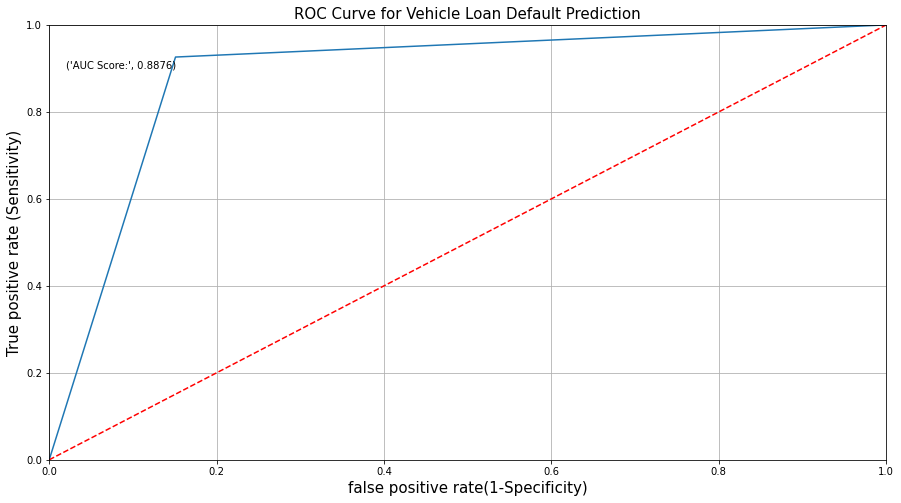

In [110]:
plot_roc(rf)

Conclusion

So from this classification problem, we can see that RandomForest Model gives Good accuracy when compared to Logistic and Decision Tree Models.
